In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_4.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
datasets=["DF4","DF5","DF6","DF7","DF12","DF13","DF14","DF15"]

for index,dataset in enumerate(datasets):
  test = pd.read_csv(f'PATH/{dataset}.csv.gz',compression='gzip',lineterminator='\n');
  print(len(test))

693
13276
2484
50538
23800
580
1692
2080


In [ ]:
# DS={}
# for ds_index in range(1,8):
#     DS["DS"+str(ds_index)]=pd.concat([data[data["class"]=="bot"],data[data["class"]=="human"].sample(60364)])
#     DS["DS"+str(ds_index)]= DS["DS"+str(ds_index)].sample(frac=1).reset_index(drop=True)

DS={}
human=data[data["class"]=="human"]
human.reset_index(drop=True,inplace=True)
for ds_index in range(1,8):
    DS["DS"+str(ds_index)]=pd.concat([data[data["class"]=="bot"],human.loc[60364*(ds_index-1):60364*ds_index-1,:]])
    DS["DS"+str(ds_index)]= DS["DS"+str(ds_index)].sample(frac=1).reset_index(drop=True)

In [ ]:
X={}
y={}
for ds_index in range(1,8):
  X["train"+str(ds_index)], X["test"+str(ds_index)], y["train"+str(ds_index)], y["test"+str(ds_index)] = train_test_split(DS["DS"+str(ds_index)].drop(['class'],axis=1), DS["DS"+str(ds_index)]['class'], test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifer={}
for ds_index in range(1,8):
  classifer["RF"+str(ds_index)]=RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
  classifer["RF"+str(ds_index)].fit(X["train"+str(ds_index)], y["train"+str(ds_index)])



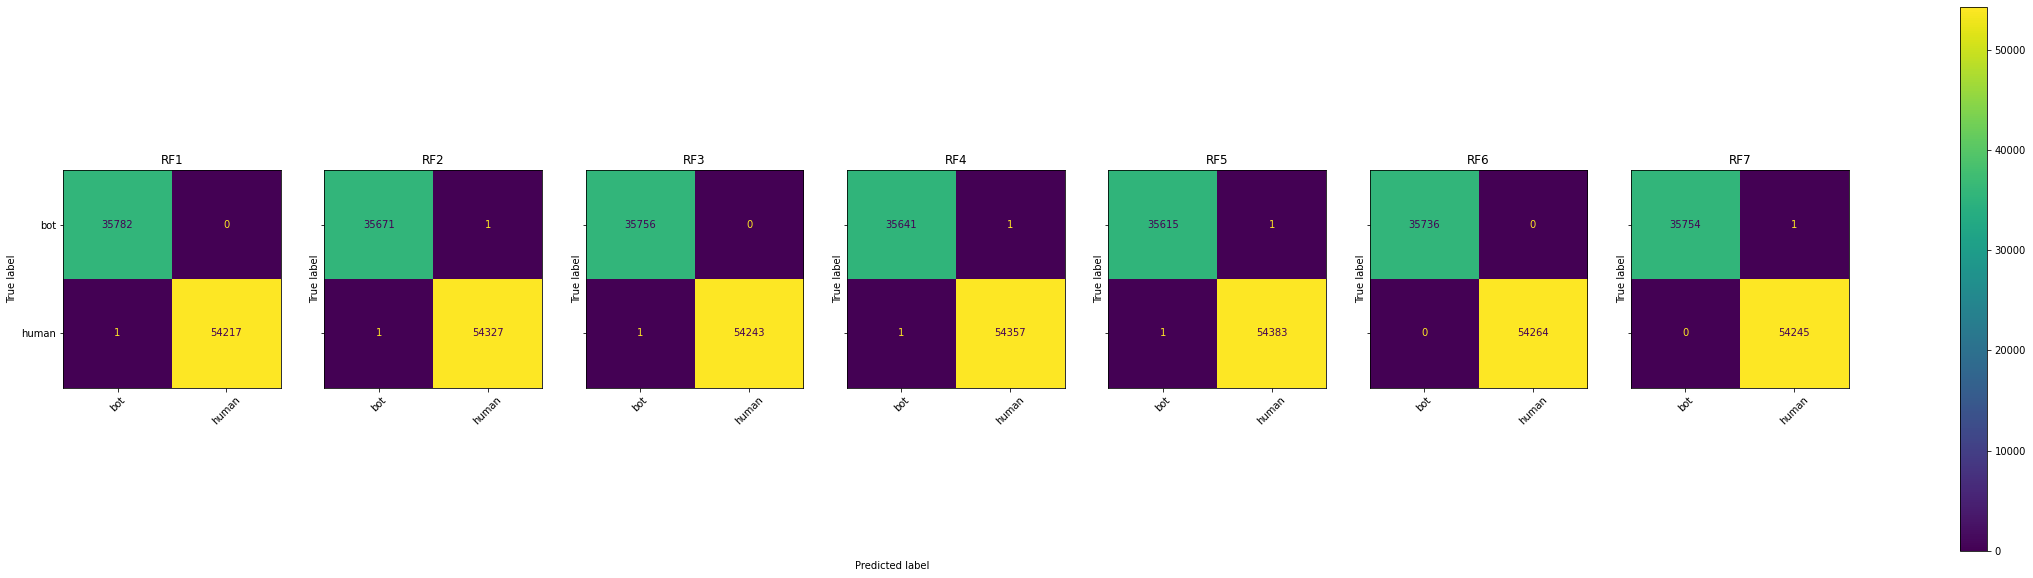

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.999972,1.000000,0.999986,35782,1.000000,0.999982,0.999991,54218,0.999989
1,RF2,0.999972,0.999972,0.999972,35672,0.999982,0.999982,0.999982,54328,0.999978
2,RF3,0.999972,1.000000,0.999986,35756,1.000000,0.999982,0.999991,54244,0.999989
3,RF4,0.999972,0.999972,0.999972,35642,0.999982,0.999982,0.999982,54358,0.999978
4,RF5,0.999972,0.999972,0.999972,35616,0.999982,0.999982,0.999982,54384,0.999978
5,RF6,1.000000,1.000000,1.000000,35736,1.000000,1.000000,1.000000,54264,1.000000
6,RF7,1.000000,0.999972,0.999986,35755,0.999982,1.000000,0.999991,54245,0.999989


In [ ]:
y_predict={}
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])

for i, (key, clas_f) in enumerate(classifer.items()):
  
    y_predict["train"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["train"+str(i+1)])
    cf_matrix = confusion_matrix(y["train"+str(i+1)], y_predict["train"+str(i+1)])
    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["train"+str(i+1)], y_predict["train"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

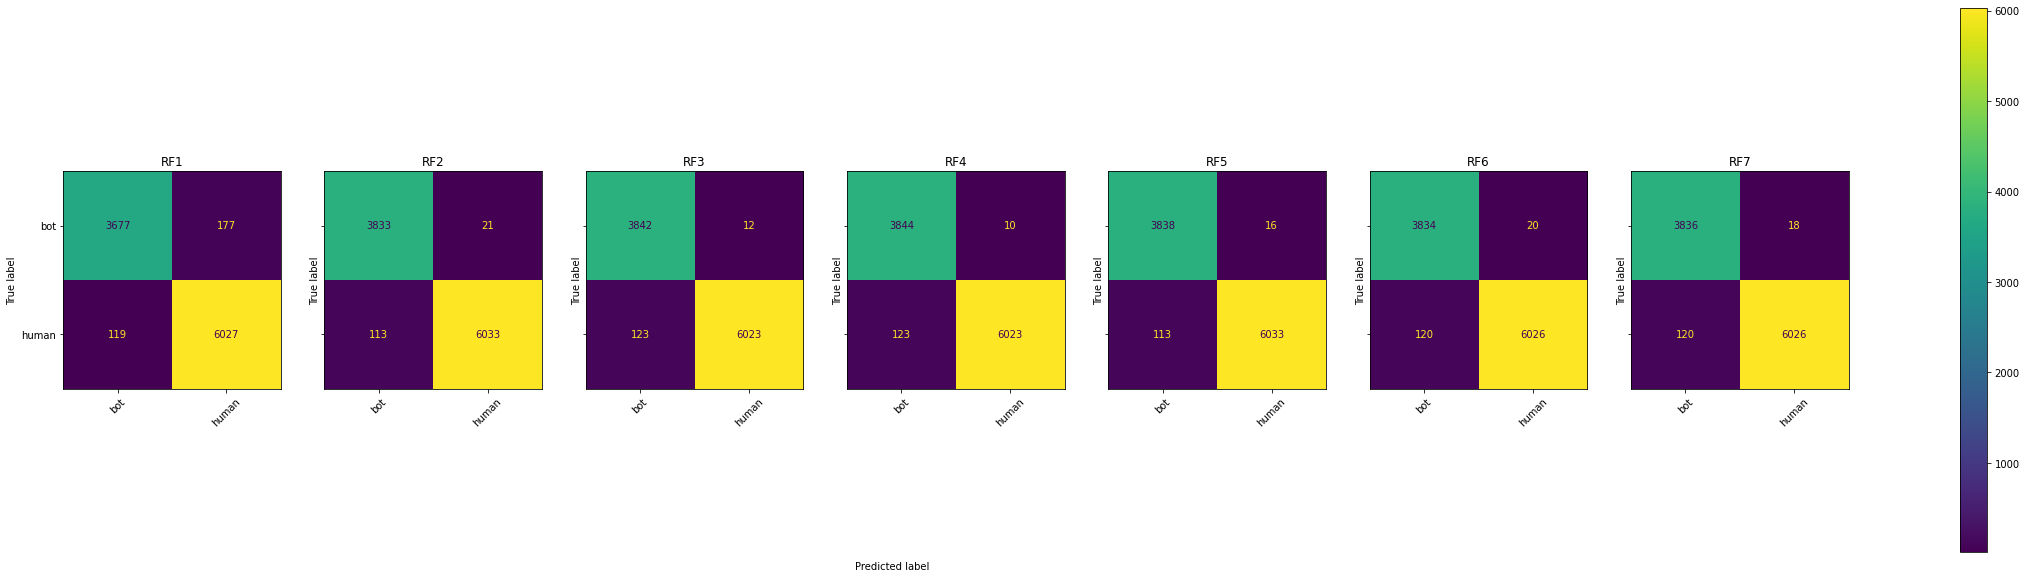

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.968651,0.954074,0.961307,3854,0.971470,0.980638,0.976032,6146,0.9704
1,RF2,0.971363,0.994551,0.982821,3854,0.996531,0.981614,0.989016,6146,0.9866
2,RF3,0.968979,0.996886,0.982734,3854,0.998012,0.979987,0.988917,6146,0.9865
3,RF4,0.968994,0.997405,0.982995,3854,0.998342,0.979987,0.989080,6146,0.9867
4,RF5,0.971400,0.995848,0.983472,3854,0.997355,0.981614,0.989422,6146,0.9871
5,RF6,0.969651,0.994811,0.982070,3854,0.996692,0.980475,0.988517,6146,0.9860
6,RF7,0.969666,0.995330,0.982330,3854,0.997022,0.980475,0.988679,6146,0.9862


In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test1"])
    cf_matrix = confusion_matrix(y["test1"], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["test1"], y_predict["test"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

In [ ]:
print(len(y_predict["test1"]))

10000


In [ ]:
output_prediction=list()
for index,value in enumerate(y_predict["test1"]):
  if [y_predict["test1"][index],y_predict["test2"][index],y_predict["test3"][index],y_predict["test4"][index],y_predict["test5"][index],y_predict["test6"][index],y_predict["test7"][index]].count("bot")>3:
    output_prediction.append("bot")
  else:
    output_prediction.append("human")
output_prediction = np.array(output_prediction)

              precision    recall  f1-score   support

         bot       0.97      1.00      0.98      3854
       human       1.00      0.98      0.99      6146

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



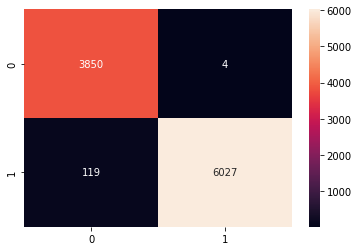

In [ ]:
print(classification_report(y["test1"], output_prediction))
cm = confusion_matrix(y["test1"], output_prediction)
sns.heatmap(cm, annot=True,fmt="d")

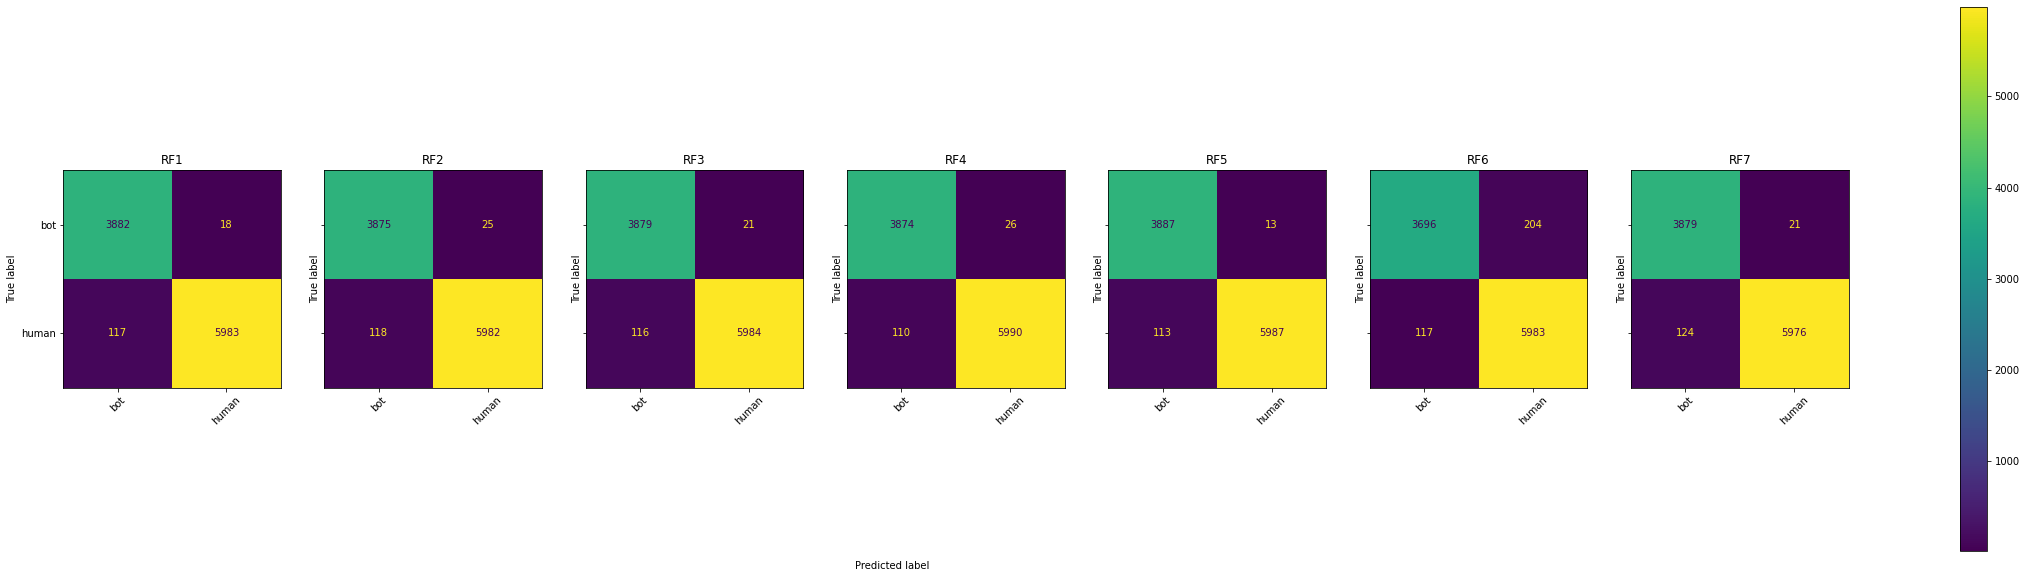

In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test6"])
    cf_matrix = confusion_matrix(y["test6"], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
X["test1"].head()

,favourites_count,followers_count,favourites_growth_rate,followers_friends_ratio,friends_growth_rate,statuses_count,listed_count,friends_count,followers_growth_rate,verified,tweet_freq,listed_growth_rate,name_length,description_length,screen_name_length,default_profile,profile_use_background_image,num_digits_in_screen_name,num_digits_in_name
8491,-0.511442,-0.026996,-0.141174,-0.046262,0.103936,-0.416301,-0.054088,-0.077895,-0.046262,-0.085482,-0.093946,-0.055250,-0.067182,-0.575697,0.299034,0.496984,0.360351,-0.036188,-0.201301
89406,-0.510843,-0.027116,-0.141146,-0.053071,-0.053518,-0.421571,-0.054088,-0.073379,-0.053071,-0.085482,-0.115665,-0.055250,0.213474,1.687305,1.493087,0.496984,0.360351,3.346025,-0.201301
29694,3.381075,-0.022329,0.406632,-0.046681,-0.075000,0.889613,-0.048999,-0.040536,-0.046681,-0.085482,0.065183,-0.048362,0.634458,0.685648,0.697052,-2.012137,-2.775074,-0.519361,-0.201301
98915,-0.450826,-0.024241,-0.126945,-0.046406,-0.077282,-0.413044,-0.048999,-0.090417,-0.046406,-0.085482,-0.114230,-0.043499,0.213474,-0.965231,-0.895018,0.496984,0.360351,-0.519361,-0.201301
67198,0.131231,-0.026782,0.105049,-0.051947,-0.077540,-0.346075,-0.054088,-0.108892,-0.051947,-0.085482,-0.087486,-0.055250,-0.207510,0.166270,-0.497001,0.496984,0.360351,-0.519361,-0.201301


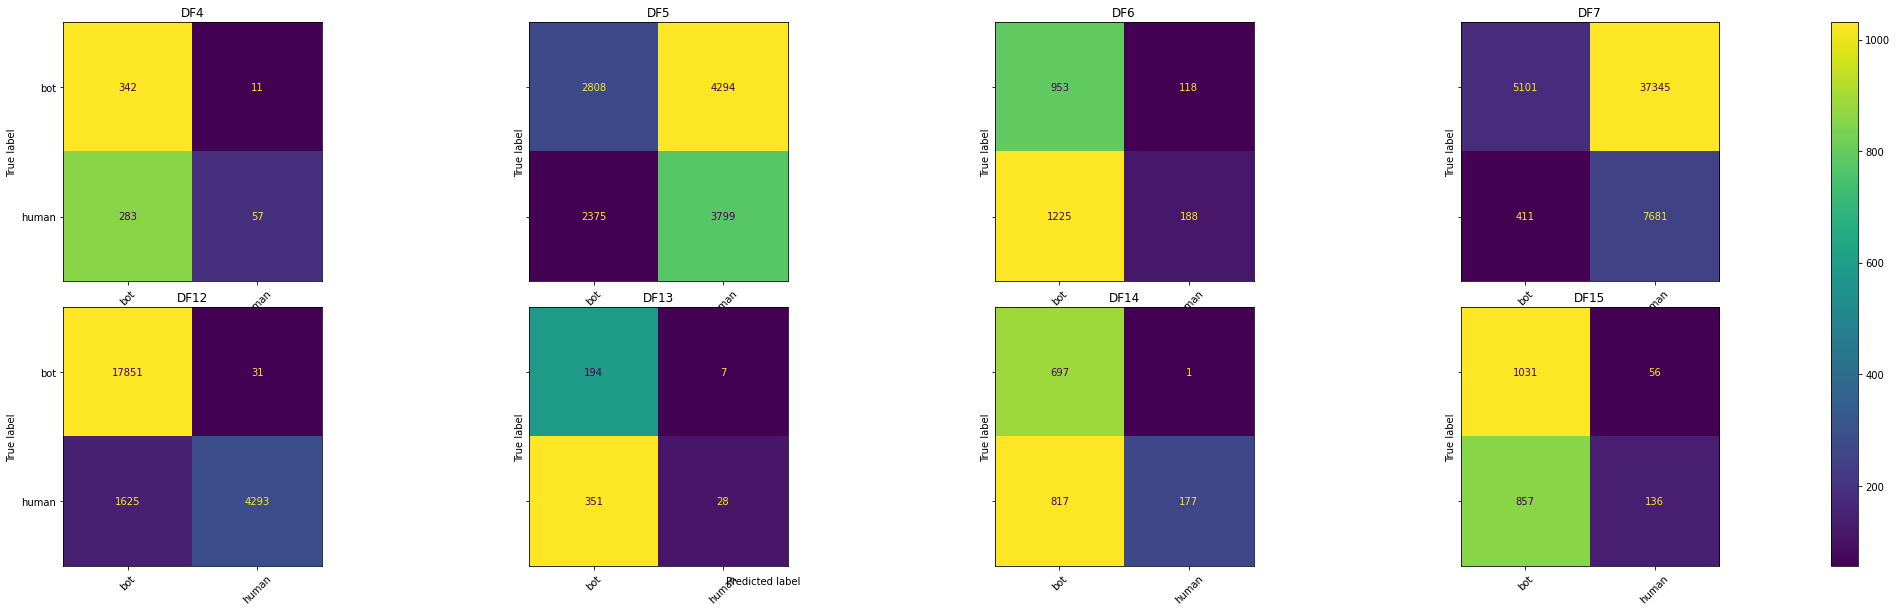

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,DF4,0.547200,0.968839,0.699387,353,0.838235,0.167647,0.279412,340,0.575758
1,DF5,0.541771,0.395382,0.457143,7102,0.469418,0.615322,0.532558,6174,0.497665
2,DF6,0.437557,0.889823,0.586642,1071,0.614379,0.133050,0.218732,1413,0.459340
3,DF7,0.925435,0.120176,0.212728,42446,0.170590,0.949209,0.289205,8092,0.252919
4,DF12,0.916564,0.998266,0.955672,17882,0.992831,0.725414,0.838313,5918,0.930420
5,DF13,0.355963,0.965174,0.520107,201,0.800000,0.073879,0.135266,379,0.382759
6,DF14,0.460370,0.998567,0.630199,698,0.994382,0.178068,0.302048,994,0.516548
7,DF15,0.546081,0.948482,0.693109,1087,0.708333,0.136959,0.229536,993,0.561058


In [ ]:
datasets=["DF4","DF5","DF6","DF7","DF12","DF13","DF14","DF15"]
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])

f, axes = plt.subplots(2, 4, figsize=(40, 10), sharey='row')

for index,dataset in enumerate(datasets):
  test = pd.read_csv(f'PATH/{dataset}.csv.gz',compression='gzip',lineterminator='\n');
  test= test.sample(frac=1).reset_index(drop=True)

  y_new_predict={}
  for i, (key, clas_f) in enumerate(classifer.items()):
    y_new_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(test.drop(['class'],axis=1))
  output_prediction=list()
  for index_2,value in enumerate(y_new_predict["test1"]):
    if [y_new_predict["test1"][index_2],y_new_predict["test2"][index_2],y_new_predict["test3"][index_2],y_new_predict["test4"][index_2],y_new_predict["test5"][index_2],y_new_predict["test6"][index_2],y_new_predict["test7"][index_2]].count("bot")>3:
      output_prediction.append("bot")
    else:
      output_prediction.append("human")
  output_prediction = np.array(output_prediction)

  classifer_accuracy_row=[dataset]
  for index_2,(key,value) in enumerate(classification_report(test['class'], output_prediction,output_dict=True).items()):
    if key in ["bot","human"]:
      classifer_accuracy_row.extend([*value.values()])
    elif key=="accuracy":
      classifer_accuracy_row.append(value)
  classifer_accuracy_result.loc[index]=classifer_accuracy_row

  cf_matrix = confusion_matrix(test['class'], output_prediction)
  disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
  disp.plot(ax=axes[int(np.floor(index/4))][index%4], xticks_rotation=45)
  disp.ax_.set_title(dataset)
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)